# Spaceship Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
tdf=pd.read_csv('train.csv')

In [3]:
tdf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
tdf.shape

(8693, 14)

### duplicated

In [5]:
tdf.duplicated().sum()

0

### null

In [6]:
tdf.isnull().sum()/tdf.shape[0]

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

### RoomService / FoodCourt / ShoppingMall / Spa / VRDeck

In [7]:
tdf['RoomService'].fillna(0.0,inplace=True)
tdf['FoodCourt'].fillna(0.0,inplace=True)
tdf['ShoppingMall'].fillna(0.0,inplace=True)
tdf['Spa'].fillna(0.0,inplace=True)
tdf['VRDeck'].fillna(0.0,inplace=True)

### Age

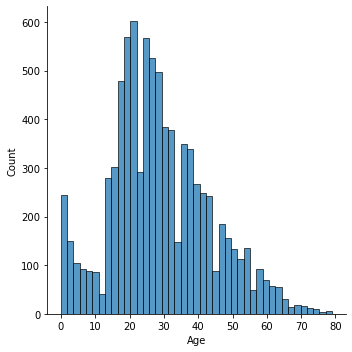

In [8]:
sns.displot(tdf['Age'])

In [9]:
tdf['Age'].fillna(tdf['Age'].mean(),inplace=True)

In [10]:
tdf['Age'].describe()

count    8693.000000
mean       28.827930
std        14.339054
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [11]:
for i in range(8693):
    value = pd.to_numeric(tdf.iloc[i, 5], errors='coerce')
    if value < 20:
        tdf.iloc[i, 5] = 'small'
    elif 20 <= value <= 37:
        tdf.iloc[i, 5] = 'young'
    elif 38 <= value <= 60:
        tdf.iloc[i, 5] = 'Middle adulthood'
    else:
        tdf.iloc[i, 5] = 'old'

In [12]:
tdf.drop(['Name'],axis=1,inplace=True)

### VIP

In [13]:
tdf['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [14]:
tdf['VIP'].isnull().sum()

203

In [15]:
tdf['VIP'].fillna('False',inplace=True)

### HomePlanet 

In [16]:
tdf['Group'] = tdf['PassengerId'].str.split('_').str[0]

grouped = tdf.groupby(['Group', 'HomePlanet']).size().unstack()

grouped.head(10)

HomePlanet,Earth,Europa,Mars
Group,,,
0001,NaN,1.0,NaN
0002,1.0,NaN,NaN
0003,NaN,2.0,NaN
0004,1.0,NaN,NaN
0005,1.0,NaN,NaN
0006,2.0,NaN,NaN
0007,1.0,NaN,NaN
0008,NaN,3.0,NaN
0009,NaN,NaN,1.0


In [17]:
tdf['HomePlanet'].isnull().sum()

201

In [18]:
group_to_homeplanet = grouped.idxmax(axis=1).to_dict()

tdf['HomePlanet'] = tdf.apply(lambda row: group_to_homeplanet.get(row['Group'], row['HomePlanet']), axis=1)

In [19]:
tdf['HomePlanet'].isnull().sum()

111

In [20]:
tdf['HomePlanet'].value_counts()

Earth     4634
Europa    2161
Mars      1787
Name: HomePlanet, dtype: int64

In [21]:
tdf['HomePlanet'].fillna('Earth',inplace=True)

### Destination

In [22]:
grouped = tdf.groupby(['Group', 'Destination']).size().unstack()
grouped.head()

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Group,,,
0001,NaN,NaN,1.0
0002,NaN,NaN,1.0
0003,NaN,NaN,2.0
0004,NaN,NaN,1.0
0005,NaN,1.0,NaN


In [23]:
tdf['Destination'].isnull().sum()

182

In [24]:
tdf['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [25]:
tdf['Destination'].fillna('TRAPPIST-1e',inplace=True)

### CryoSleep

In [26]:
grouped = tdf.groupby(['Group', 'CryoSleep']).size().unstack()
grouped.head()

CryoSleep,False,True
Group,,
0001,1.0,NaN
0002,1.0,NaN
0003,2.0,NaN
0004,1.0,NaN
0005,1.0,NaN


In [27]:
tdf['CryoSleep'].isnull().sum()

217

In [28]:
tdf['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [29]:
tdf['CryoSleep'].fillna('False',inplace=True)

### Cabin            

In [30]:
tdf['Cabin'] = tdf['Cabin'].str.extract(r'([PS])', expand=False)

In [31]:
grouped = tdf.groupby(['Group', 'Cabin']).size().unstack()
grouped.head()

Cabin,P,S
Group,,
0001,1.0,NaN
0002,NaN,1.0
0003,NaN,2.0
0004,NaN,1.0
0005,1.0,NaN


In [32]:
tdf['Cabin'].isnull().sum()

199

In [33]:
group_to_Cabin = grouped.idxmax(axis=1).to_dict()

tdf['Cabin'] = tdf.apply(lambda row: group_to_Cabin.get(row['Group'], row['Cabin']), axis=1)

In [34]:
tdf['Cabin'].isnull().sum()

99

In [35]:
tdf['Cabin'].value_counts()

S    4343
P    4251
Name: Cabin, dtype: int64

In [36]:
tdf['Cabin'].fillna('S',inplace=True)

### type

In [37]:
tdf.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age              object
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Group            object
dtype: object

In [38]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age','VIP']
tdf_dummies = pd.get_dummies(tdf[categorical_cols])
x = pd.concat([tdf_dummies, tdf[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]], axis=1)

In [39]:
y=tdf['Transported']

In [40]:
x

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,CryoSleep_False,Cabin_P,Cabin_S,Destination_55 Cancri e,Destination_PSO J318.5-22,...,Age_small,Age_young,VIP_False,VIP_True,VIP_False,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,1,0,0,0,1,0,0,...,0,1,1,0,0,109.0,9.0,25.0,549.0,44.0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,43.0,3576.0,0.0,6715.0,49.0
3,0,1,0,1,0,0,0,1,0,0,...,0,1,1,0,0,0.0,1283.0,371.0,3329.0,193.0
4,1,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0.0,6819.0,0.0,1643.0,74.0
8689,1,0,0,0,1,0,0,1,0,1,...,1,0,1,0,0,0.0,0.0,0.0,0.0,0.0
8690,1,0,0,1,0,0,0,1,0,0,...,0,1,1,0,0,0.0,0.0,1872.0,1.0,0.0
8691,0,1,0,1,0,0,0,1,1,0,...,0,1,1,0,0,0.0,1049.0,0.0,353.0,3235.0


## classification model

<AxesSubplot:ylabel='Transported'>

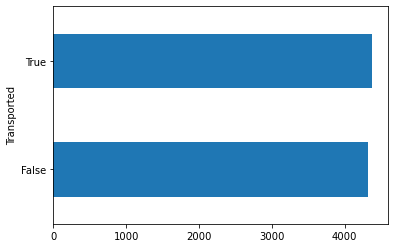

In [41]:
p1=tdf.groupby('Transported')['Cabin'].count()
p1.plot.barh()

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

              precision    recall  f1-score   support

       False       0.83      0.74      0.78      1077
        True       0.77      0.85      0.81      1097

    accuracy                           0.80      2174
   macro avg       0.80      0.79      0.79      2174
weighted avg       0.80      0.80      0.79      2174



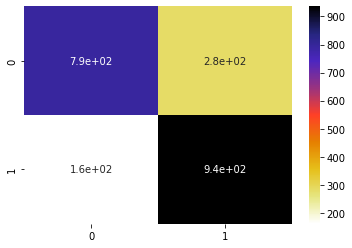

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model =LogisticRegression()
model.fit(x_train,y_train)
prediction_results = model.predict(x_test)
repo = classification_report(y_test, prediction_results)

print(repo)

cm = confusion_matrix(y_test, prediction_results)
sns.heatmap(cm, cmap="CMRmap_r", annot=True)
plt.show()

# test

In [95]:
sdf=pd.read_csv('test.csv')

In [96]:
sdf.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [97]:
sdf['RoomService'].fillna(0.0,inplace=True)
sdf['FoodCourt'].fillna(0.0,inplace=True)
sdf['ShoppingMall'].fillna(0.0,inplace=True)
sdf['Spa'].fillna(0.0,inplace=True)
sdf['VRDeck'].fillna(0.0,inplace=True)

In [98]:
sdf['Age'].fillna(sdf['Age'].mean(),inplace=True)

In [99]:
for i in range(4277):
    value = pd.to_numeric(sdf.iloc[i, 5], errors='coerce')
    if value < 20:
        sdf.iloc[i, 5] = 'small'
    elif 20 <= value <= 37:
        sdf.iloc[i, 5] = 'young'
    elif 38 <= value <= 60:
        sdf.iloc[i, 5] = 'Middle adulthood'
    else:
        sdf.iloc[i, 5] = 'old'

In [100]:
sdf.drop(['Name'],axis=1,inplace=True)

In [101]:
sdf['VIP'].fillna('False',inplace=True)

In [102]:
sdf['Group'] = sdf['PassengerId'].str.split('_').str[0]

grouped = sdf.groupby(['Group', 'HomePlanet']).size().unstack()

In [103]:
group_to_homeplanet = grouped.idxmax(axis=1).to_dict()

sdf['HomePlanet'] = sdf.apply(lambda row: group_to_homeplanet.get(row['Group'], row['HomePlanet']), axis=1)

In [104]:
sdf['HomePlanet'].fillna('Earth',inplace=True)

In [105]:
sdf['Destination'].fillna('TRAPPIST-1e',inplace=True)

In [106]:
sdf['CryoSleep'].fillna('False',inplace=True)

In [107]:
sdf['Cabin'] = sdf['Cabin'].str.extract(r'([PS])', expand=False)

grouped = sdf.groupby(['Group', 'Cabin']).size().unstack()
grouped.head()

sdf['Cabin'].fillna('S',inplace=True)

In [108]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP']
sdf_dummies = pd.get_dummies(sdf[categorical_cols])

x_test= pd.concat([sdf_dummies, sdf[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]], axis=1)


In [109]:
x_test.shape

(4277, 23)

In [110]:
predictions = model.predict(x_test)

output = pd.DataFrame({'PassengerId': sdf.PassengerId, 'Transported': predictions})

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
